#Reggression

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Digital Skola/Catatan Materi/Session 33/kc_house_data.csv', delimiter = ",")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Linear Regression

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_X = df.drop(['id','date','price'], axis = 1)
df_y = df['price']
X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination of training set')
print(reg.score(X_train, y_train))
print('coef of determination of testing set')
print(reg.score(X_test, y_test))
print('coefficient')
print(reg.coef_)
print('intercept')
print(reg.intercept_)
print('prediction')
y_pred= reg.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[:10])

coef of determination of training set
0.6995155846436758
coef of determination of testing set
0.6994627057969862
coefficient
[-3.43081477e+04  4.03129700e+04  1.12001375e+02  9.91841247e-02
  5.27154218e+03  5.43877177e+05  5.50830616e+04  2.31460673e+04
  9.49081794e+04  7.22190669e+01  3.97823083e+01 -2.59441847e+03
  2.19209734e+01 -5.56358731e+02  5.95216324e+05 -1.96904658e+05
  1.62077488e+01 -3.30430480e-01]
intercept
6641646.708113588
prediction
[ 458597.0676416   748993.75994814 1243303.75799055 1665116.95095444
  737302.05741739  283239.58524974  831732.87582315  495383.02095338
  385779.81919026  474179.42285135]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('rmse :', rmse)
print('r2 :', r2)

rmse : 208296.72772119008
r2 : 0.6994627057969862


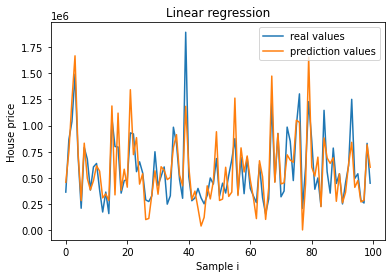

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=y_test[:100], label='real values')
sns.lineplot(data=y_pred[:100], label='prediction values')
plt.title("Linear regression")
plt.xlabel("Sample i")
plt.ylabel("House price")
plt.show()

#LASSO

In [36]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

df_X = df.drop(['id','date','price'], axis = 1)
df_y = df['price']
X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
las = Lasso(alpha=0.5)
las.fit(X_train, y_train)

print('coef of determination of training set')
print(las.score(X_train, y_train))
print('coef of determination of testing set')
print(las.score(X_test, y_test))
print('coefficient')
print(las.coef_)
print('intercept')
print(las.intercept_)
print('prediction')
y_pred= las.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[:10])

coef of determination of training set
0.6995155840368912
coef of determination of testing set
0.6994610128651567
coefficient
[-3.43076850e+04  4.03114120e+04  2.84911657e+02  9.91632259e-02
  5.27123079e+03  5.43797338e+05  5.50856199e+04  2.31442635e+04
  9.49094340e+04 -1.00690981e+02 -1.33125080e+02 -2.59448802e+03
  2.19215887e+01 -5.56289851e+02  5.95183981e+05 -1.96858621e+05
  1.62061133e+01 -3.30453373e-01]
intercept
6642194.0148119265
prediction
[ 458599.02700703  748987.81240724 1243307.2686813  1665112.63804503
  737301.38730387  283243.81761957  831725.91072839  495376.35394859
  385782.2224216   474176.56791352]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269579356525682.75, tolerance: 197654197140.59027
  positive)


#Ridge

In [37]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

df_X = df.drop(['id','date','price'], axis = 1)
df_y = df['price']
X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
ri = Ridge(alpha=0.01)
ri.fit(X_train, y_train)

print('coef of determination of training set')
print(ri.score(X_train, y_train))
print('coef of determination of testing set')
print(ri.score(X_test, y_test))
print('coefficient')
print(ri.coef_)
print('intercept')
print(ri.intercept_)
print('prediction')
y_pred= ri.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[:10])

coef of determination of training set
0.6995155843891786
coef of determination of testing set
0.6994617671452467
coefficient
[-3.43085910e+04  4.03130801e+04  1.11694545e+02  9.91756370e-02
  5.27267835e+03  5.43816593e+05  5.50852591e+04  2.31457666e+04
  9.49089071e+04  7.25255874e+01  4.00903197e+01 -2.59446291e+03
  2.19212660e+01 -5.56332221e+02  5.95191202e+05 -1.96891392e+05
  1.62073860e+01 -3.30437165e-01]
intercept
6641946.494724116
prediction
[ 458599.41399769  748989.94188729 1243307.38502354 1665117.78004211
  737300.27313796  283242.21978917  831729.07439494  495380.4488715
  385780.70078211  474178.82192239]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


#Decision Tree Regression

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df_X = df.drop(['id','date','price'], axis = 1)
df_y = df['price']
X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)

print('coef of determination of training set')
print(dt.score(X_train, y_train))
print('coef of determination of testing set')
print(dt.score(X_test, y_test))

print('prediction')
y_pred= dt.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination of training set
0.9185274272472611
coef of determination of testing set
0.7665386143652327
prediction
[ 372512.5         837693.06862745 1087247.96153846 1984617.64705882
  656314.08658009  237079.87179487  849106.21276596  517991.26363636
  366270.875       519039.40166667]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('rmse :', rmse)
print('r2 :', r2)

rmse : 183586.5204902119
r2 : 0.7665386143652327


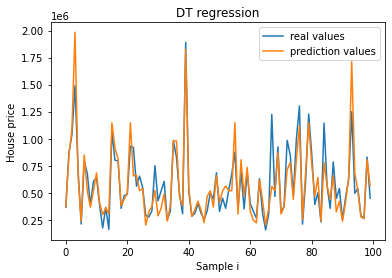

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=y_test[:100], label='real values')
sns.lineplot(data=y_pred[:100], label='prediction values')
plt.title("DT regression")
plt.xlabel("Sample i")
plt.ylabel("House price")
plt.show()

#Random Forest

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_X = df.drop(['id','date','price'], axis = 1)
df_y = df['price']
X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination of training set')
print(rf.score(X_train, y_train))
print('coef of determination of testing set')
print(rf.score(X_test, y_test))

print('prediction')
y_pred= rf.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination of training set
0.9823320499000884
coef of determination of testing set
0.8615554555735065
prediction
[ 373211.5   861225.01 1110652.9  2079261.    701523.35  245493.54
  864426.5   633319.29  404500.45  545524.  ]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]
